# Model Performance and Evaluation Method 

* We need to assess the performance of a Machine Learning Model because it is only prediction and prediction can be wrong  
* To measure performance, we use some metrics   
* we already used accuracy for classification problem and R-square or mse for regression problem   



## Classification 
**Commonly used:**  
* Accuracy  
* Recall  
* Precision  
* F1-score  
* ROC/AUC  
* PR-Curve  


## Confusion Matrix
<img src= 'confmat.png'>  

* True Positive (TP): You are **pregnant** and the prediction is **pregnant**  
* False Posirive (FP): You are **not pregnant** but the prediction is you are **pregnant**  
* True Negative (TN): You are **not pregnant** and the prediction is **not pregnant**  
* False Negative(FN): You are **pregnant**, but the prediction is you are **not pregnant**  

* Accuracy: Berapa prediksi yang benar, dari seluruh prediksi.  
>* (TP+TN)/(TP+TN+FP+FN)  
* Recall: Berapa TP yang benar dari seluruh data yang aktualnya Positif  
>* TP/(TP+FN)     
* Precision : Berapa TP yang benar dari seluruh data yang Prediksinya positif 
>* TP/(TP+FP)  
* F1-score  : Kombinasi antara recall dan precision. 
>* 2 x (Precision x Recall)/(Precision + Recall)  
* ROC/AUC  
* PR-Curve  

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
wine=pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [14]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [15]:
wine=wine.dropna()

In [16]:
wine['quality']=[1 if i>6 else 0 for i in wine['quality']]
wine['quality'].value_counts()

0    421
1     98
Name: quality, dtype: int64

In [19]:
x= wine[['density','alcohol']]
y=wine['quality']


In [20]:
x_train,x_test, y_train, y_test=train_test_split(x,y, stratify=y, random_state=2020, test_size=0.2)

In [21]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [33]:
y_test.shape

(104,)

In [61]:
confusion_matrix(y_test,y_pred)

array([[81,  3],
       [12,  8]], dtype=int64)

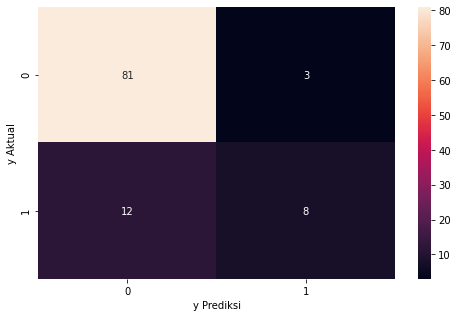

In [30]:
#membuat visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        84
           1       0.73      0.40      0.52        20

    accuracy                           0.86       104
   macro avg       0.80      0.68      0.72       104
weighted avg       0.84      0.86      0.84       104



In [36]:
recall_score(y_test,y_pred, pos_label=0) # pos_label menentukan apakah score yang keluar berasal dari kelas negatis/positif. default positif/1

0.9642857142857143

In [37]:
f1_score(y_test,y_pred)

0.5161290322580645

In [35]:
precision_score(y_test,y_pred)

0.7272727272727273

In [60]:
roc_auc_score(y_test,y_pred)

0.682142857142857

In [39]:
y_pred_proba=logreg.predict_proba(x_test)

In [58]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.974488,0.025512
1,0.918974,0.081026
2,0.298826,0.701174
3,0.887314,0.112686
4,0.529682,0.470318
...,...,...
99,0.967693,0.032307
100,0.499616,0.500384
101,0.927511,0.072489
102,0.954169,0.045831


In [52]:
pd.DataFrame(y_pred)

,0
0,0
1,0
2,1
3,0
4,0
...,...
99,0
100,1
101,0
102,0


# Model Evaluasi: Cross Validation

# Let's try: bankloan dataset

- Data
- Data Splitting
- Model Evaluation Benchmark
- Simple Hyperprameter Tuning
- Hyperparameter Tuning Grid Search

> ## Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
bankloan = pd.read_csv('bankloan.csv')

In [3]:
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


> ## Data Splitting

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

In [5]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [6]:
X = bankloan[fitur]
y = bankloan[target]

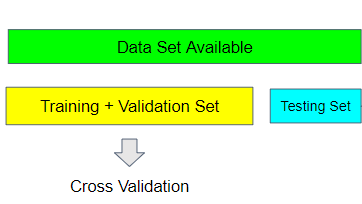

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 2020)

> ## Model Evaluation : Benchmark

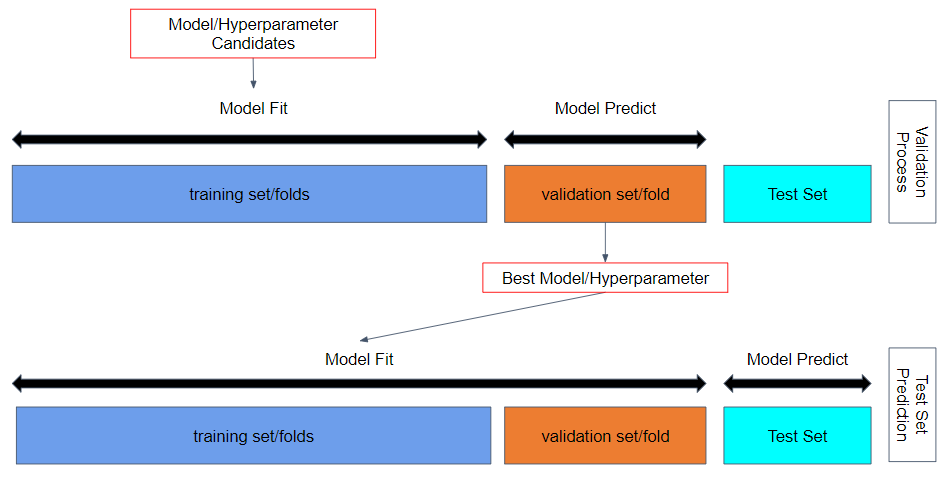

In [8]:
logreg=LogisticRegression(solver='liblinear',random_state=2020)
knn=KNeighborsClassifier()
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings

In [11]:
warnings.filterwarnings('ignore')

ACCURACY

In [14]:
skfold=StratifiedKFold(n_splits=5) # data train_val dibagi menjadi berapa bagian

logreg_cv= cross_val_score(logreg, X_train_val,y_train_val)
knn_cv= cross_val_score(knn,X_train_val,y_train_val)
tree_cv=cross_val_score(tree,X_train_val,y_train_val)
#Evaluate a score by cross-validation

In [15]:
print('CV logreg',logreg_cv)
print('CV knn',knn_cv)
print('CV tree',tree_cv)

CV logreg [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV knn [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CV tree [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


In [ ]:
print('CV logreg',logreg_cv.std())
print('CV knn',knn_cv.std())
print('CV tree',tree_cv.std())

CV logreg 0.020824828195876083
CV knn 0.024872121923543065
CV tree 0.057753434388557956


In [ ]:
print('CV logreg',logreg_cv.mean())
print('CV knn',knn_cv.mean())
print('CV tree',tree_cv.mean())

CV logreg 0.8
CV knn 0.7428571428571429
CV tree 0.7714285714285716


RECALL

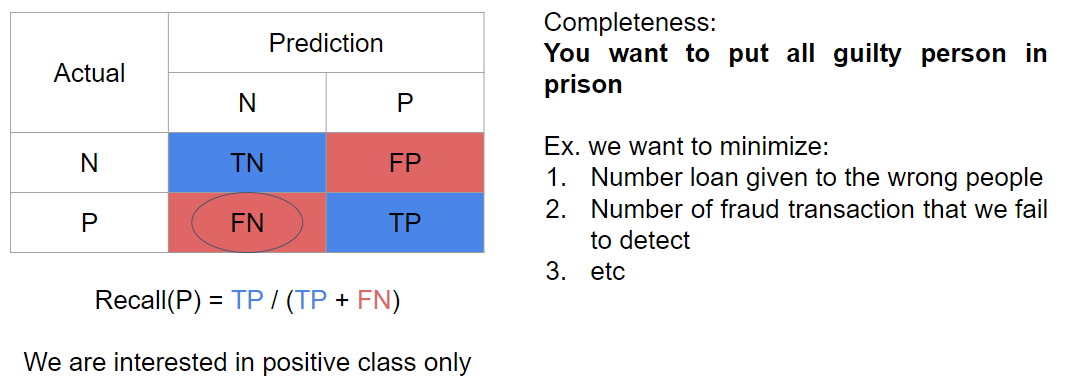

In [17]:
skfold = StratifiedKFold(n_splits = 5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring = 'recall')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring = 'recall')
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv = skfold, scoring = 'recall')

In [18]:
print('CV logreg',logreg_cv)
print('CV knn',knn_cv)
print('CV tree',tree_cv)

CV logreg [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CV knn [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CV tree [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]


In [ ]:
print('CV logreg',logreg_cv.std())
print('CV knn',knn_cv.std())
print('CV tree',tree_cv.std())

CV logreg 0.08992003317520893
CV knn 0.06021759987018779
CV tree 0.13481616986286768


In [ ]:
print('CV logreg',logreg_cv.mean())
print('CV knn',knn_cv.mean())
print('CV tree',tree_cv.mean())

CV logreg 0.46551724137931033
CV knn 0.3213793103448276
CV tree 0.4577011494252874


Log regresi, secara general memiliki score terbaik dan stabil

FLEXIBLE METRICS  
sama seperti di atas, hanya disimplify dengan membuat function

In [30]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)
# metric = 'f1' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skfold, scoring = metric)
  return model_cv

In [31]:
def print_result(model_cv):
  print('CV score',model_cv)
  print('CV score mean',model_cv.mean())
  print('CV score std',model_cv.std())

In [32]:
model_cv = model_evaluation_cv(model, 'f1')

In [33]:
print_result(model_cv)

CV score [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
CV score mean 0.543564482325905
CV score std 0.06927688261828344


MODEL PERFORMACE IN TEST SET

In [34]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)

LogisticRegression(solver='liblinear')

In [35]:
y_pred = logreg.predict(X_test)

In [36]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.4864864864864865
precision 0.782608695652174
f1 0.6000000000000001


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [38]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [41]:
from sklearn.metrics import roc_auc_score

In [ ]:
# roc_auc_score(y_test, y_pred)


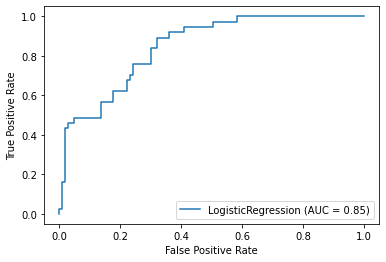

In [39]:
plot_roc_curve(logreg, X_test,y_test)

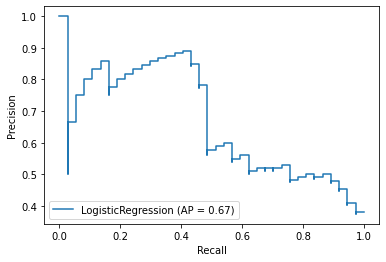

In [40]:
plot_precision_recall_curve(logreg, X_test, y_test)

> ## Simple Hyperprameter Tuning

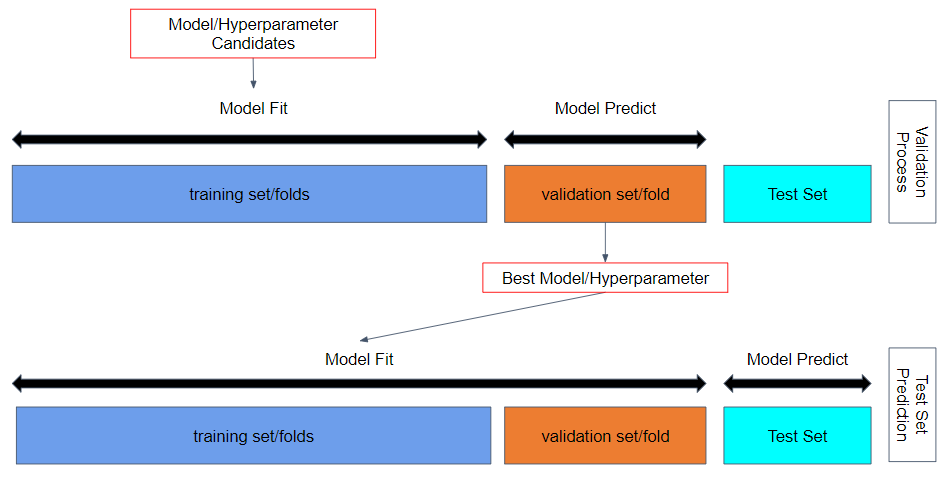

In [42]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train 60 %
X_val 20 %
X_test 20 %

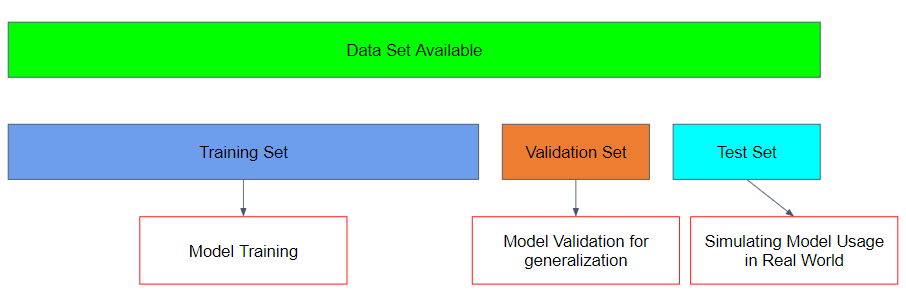

In [44]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val, 
    stratify = y_train_val,
    test_size = 0.25, # 25 % of train_val set equal to 20 % of all data set 
    random_state = 2020)

In [45]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001] # C = 1 is our benchmark
# Cfloat, default=1.0
#Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
skfold = StratifiedKFold(n_splits = 5)

best_score = 0
cv_score_validation_fold = []

for i in hyperparam_c:
  logreg = LogisticRegression(C = i, solver = 'liblinear', random_state = 2020)
  cv_score = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring = 'f1').mean()
  cv_score_validation_fold.append(cv_score)

  if cv_score > best_score:
    best_score = cv_score
    best_paramas = {'C':i}

In [46]:
print('best score',best_score)
print('best params',best_paramas)

best score 0.5563225088777649
best params {'C': 0.05}


In [47]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

training_score = []
validation_score = []

for i in hyperparam_c:
  logreg = LogisticRegression(C = i, solver = 'liblinear', random_state = 2020)
  logreg.fit(X_train,y_train)

  y_predict_train = logreg.predict(X_train)
  training_score.append(f1_score(y_train,y_predict_train))

  y_predict_val = logreg.predict(X_val)
  validation_score.append(f1_score(y_val,y_predict_val))

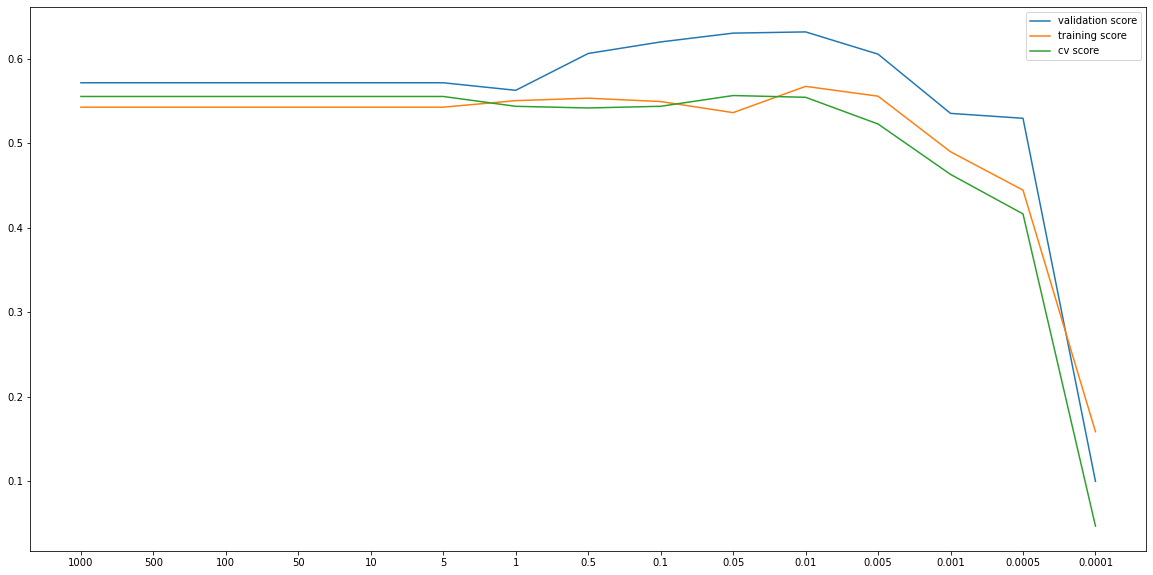

In [49]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(length,validation_score)
sns.lineplot(length,training_score)
sns.lineplot(length,cv_score_validation_fold)
plt.legend(['validation score','training score','cv score'])
plt.xticks(length,hyperparam_c)
plt.show()

> ## Final Result Comparison : Simple Hyperparameter Tuning

FINAL MODEL PERFORMANCE BEFORE

In [51]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



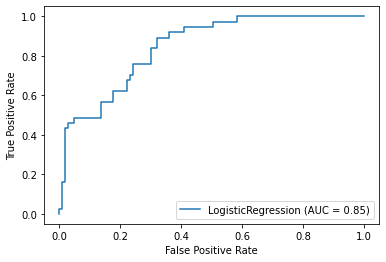

In [52]:
plot_roc_curve(logreg, X_test, y_test)

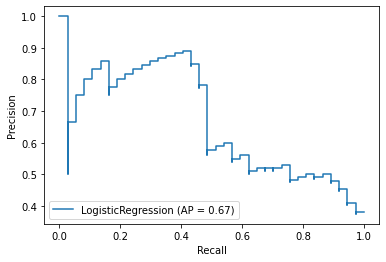

In [53]:
plot_precision_recall_curve(logreg, X_test, y_test)

FINAL MODEL PERFORMACE AFTER

In [54]:
logreg = LogisticRegression(solver = 'liblinear', C = 0.05)
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



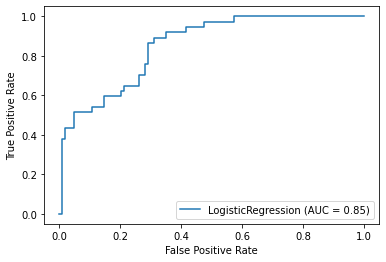

In [55]:
plot_roc_curve(logreg, X_test, y_test)

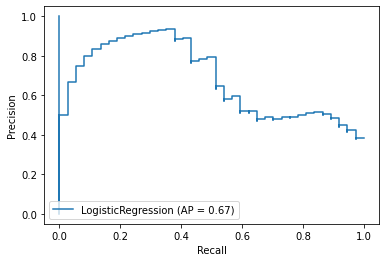

In [56]:
plot_precision_recall_curve(logreg, X_test, y_test)

In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :  
1. the improvement in the cross validation score is insignificant  
2. your choice of hyperparameter resulted in overfitting/unstable model  

Solution :  
1. changes the model  
2. more feature engineering  
3. add another hyperprameter, (we are gonna try this)  

> ## Hyperparameter Tuning Grid Search

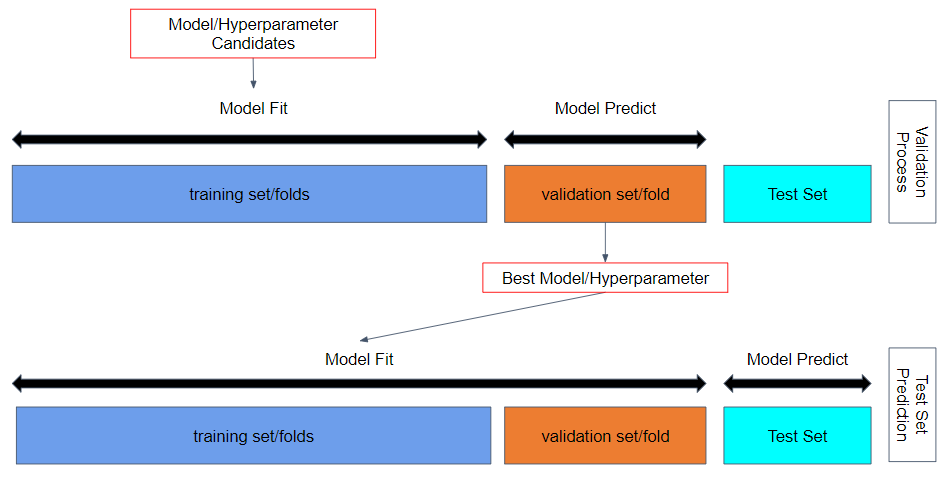

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# gridsearh: melihat semua konbinasi yang ada
# random search: memilih kombinasi secara acak

In [59]:
hyperparam_space = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # bench mark max_iter = 100
}

* C  15 hyperparameters
* max_iter 6 hyperparameters
* CV 5 fold
<br>
so, this step will train model 15*6*5 = 450 times 

In [64]:
skfold = StratifiedKFold(n_splits = 5)

logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)

random_search=RandomizedSearchCV(
    logreg,
    param_distributions= hyperparam_space,
    cv= skfold,
    scoring='f1',
    n_jobs=-1
)


In [ ]:
# skfold = StratifiedKFold(n_splits = 5)

# logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)

# grid_search = GridSearchCV(
#     logreg, # model to tune
#     param_grid = hyperparam_space, # hyperparameter space
#     cv = skfold, # evaluation method
#     scoring = 'f1', # metrics
#     n_jobs = -1 # use all cores
# )

In [65]:
random_search.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=2020,
                                                solver='liblinear'),
                   n_jobs=-1,
                   param_distributions={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5,
                                              0.1, 0.05, 0.01, 0.005, 0.001,
                                              0.0005, 0.0001],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     1000]},
                   scoring='f1')

In [ ]:
# grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2020, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [66]:
print('best score',random_search.best_score_)
print('best param',random_search.best_params_)

best score 0.5552066980638409
best param {'max_iter': 200, 'C': 1000}


In [ ]:
# print('best score',grid_search.best_score_)
# print('best param',grid_search.best_params_)

best score 0.5563225088777649
best param {'C': 0.05, 'max_iter': 100}


In [67]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006985,0.001258,0.003587,0.001193,200,1000,"{'max_iter': 200, 'C': 1000}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,1
1,0.005583,0.000797,0.003391,0.000489,400,0.005,"{'max_iter': 400, 'C': 0.005}",0.461538,0.603774,0.566667,0.510638,0.470588,0.522641,0.054969,9
2,0.008576,0.002053,0.004987,0.001092,500,100,"{'max_iter': 500, 'C': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,1
3,0.007578,0.001849,0.004587,0.000798,300,50,"{'max_iter': 300, 'C': 50}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,1
4,0.006183,0.000399,0.004588,0.000798,1000,500,"{'max_iter': 1000, 'C': 500}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,1
5,0.005985,0.000632,0.005188,0.001718,300,5,"{'max_iter': 300, 'C': 5}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,1
6,0.007781,0.003753,0.004987,0.001090,1000,0.01,"{'max_iter': 1000, 'C': 0.01}",0.500000,0.627451,0.576271,0.576923,0.490566,0.554242,0.051684,8
7,0.008772,0.003363,0.005187,0.001467,400,500,"{'max_iter': 400, 'C': 500}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,1
8,0.007181,0.000746,0.006382,0.004306,100,100,"{'max_iter': 100, 'C': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,1
9,0.006381,0.000798,0.003789,0.001163,300,0.0005,"{'max_iter': 300, 'C': 0.0005}",0.318182,0.588235,0.509091,0.325581,0.340426,0.416303,0.111163,10


In [ ]:
# pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005358,0.000865,0.002990,0.000353,1000,100,"{'C': 1000, 'max_iter': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
1,0.004749,0.000143,0.002807,0.000100,1000,200,"{'C': 1000, 'max_iter': 200}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
2,0.005065,0.000896,0.002755,0.000148,1000,300,"{'C': 1000, 'max_iter': 300}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
3,0.005407,0.001422,0.003537,0.001664,1000,400,"{'C': 1000, 'max_iter': 400}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
4,0.005306,0.001535,0.002908,0.000479,1000,500,"{'C': 1000, 'max_iter': 500}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.003960,0.000073,0.002658,0.000076,0.0001,200,"{'C': 0.0001, 'max_iter': 200}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85
86,0.008673,0.005616,0.003708,0.001745,0.0001,300,"{'C': 0.0001, 'max_iter': 300}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85
87,0.004878,0.001401,0.004195,0.002888,0.0001,400,"{'C': 0.0001, 'max_iter': 400}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85
88,0.004184,0.000419,0.003991,0.002679,0.0001,500,"{'C': 0.0001, 'max_iter': 500}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85


This method still resulted in C = 0.05 max_iter = 100 which is basically the same. so no effect in adding max_iter. you can use another method or more FE. 

> ## Final Result Comparison : Hyperparameter Tuning Grid Search

FINAL MODEL PERFORMANCE BEFORE

In [68]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



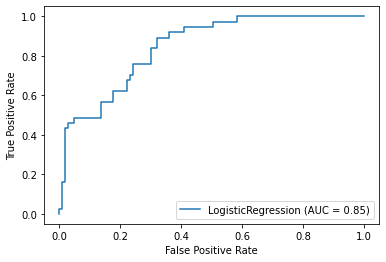

In [69]:
plot_roc_curve(logreg, X_test, y_test)

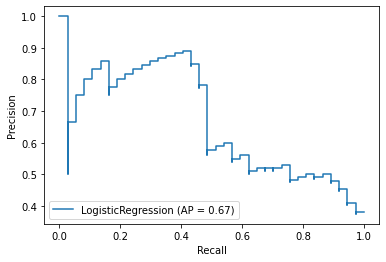

In [70]:
plot_precision_recall_curve(logreg, X_test, y_test)

FINAL MODEL PERFORMACE AFTER

In [74]:
random_search.best_estimator_

LogisticRegression(C=1000, max_iter=200, random_state=2020, solver='liblinear')

In [71]:
logreg = random_search.best_estimator_
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



In [ ]:
# logreg = grid_search.best_estimator_
# logreg.fit(X_train_val,y_train_val)
# y_pred = logreg.predict(X_test)
# print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



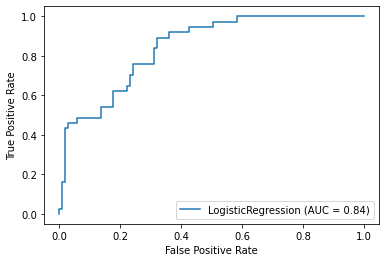

In [72]:
plot_roc_curve(logreg, X_test, y_test)

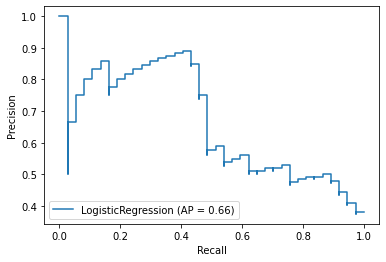

In [73]:
plot_precision_recall_curve(logreg, X_test, y_test)

In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :  
1. the improvement in the cross validation score is insignificant  
2. your choice of hyperparameter resulted in overfitting/unstable model  

Solution :  
1. changes the model  
2. more feature engineering  
3. add another hyperparameter, (we already try this, either try again or try 1 or 2)  

# Model Performance and Evaluation Method : tips dataset

> ## Data

In [94]:
import pandas as pd
import numpy as np

In [95]:
tips = sns.load_dataset('tips')

In [96]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Data Splitting

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [98]:
X = pd.get_dummies(tips.drop('tip', axis = 1))
y = tips['tip']

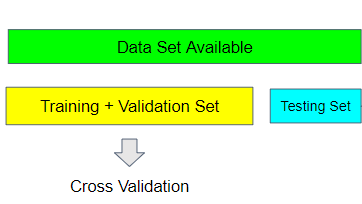

In [99]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2, 
    random_state = 2020)

> ## Model Evaluation : Benchmark

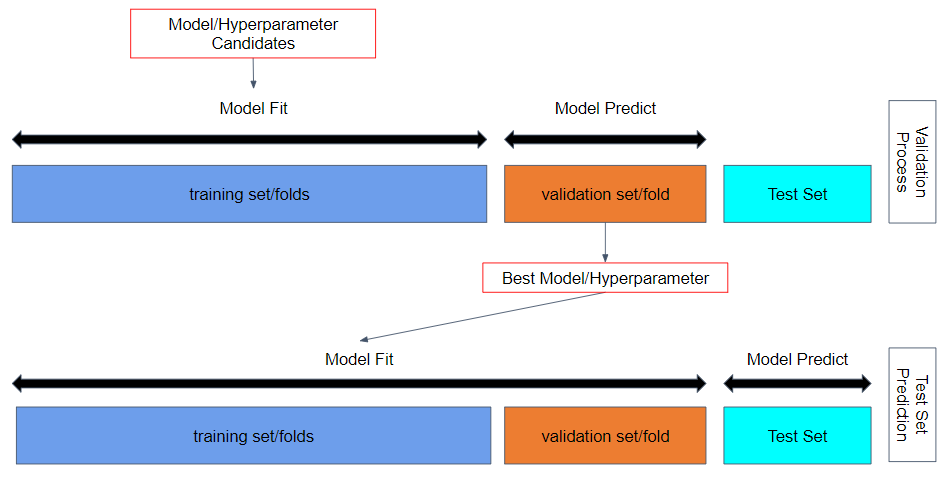

In [100]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, random_state = 2020)
linreg = LinearRegression()

In [101]:
from sklearn.metrics import SCORERS

In [102]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc

pakai neg_mean_squared_error, karena cross validation akan mencari evaluation metric tertinggi sebagai evaluasi terbaik,  
sementara pada mse, semakin rendah mse, semakin baik.

In [103]:
from sklearn.model_selection import cross_val_score
import warnings

In [104]:
model_cv = cross_val_score(tree, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [105]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [-1.0686013  -0.97814478 -1.77873212 -1.19898146 -1.19188762]
CV score mean -1.2432694552627068
CV score std 0.28004351146399903


In [106]:
model_cv = cross_val_score(linreg, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [107]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [-0.87304358 -0.84277215 -1.05989713 -1.77937311 -1.10502143]
CV score mean -1.1320214803006683
CV score std 0.3393316319526624


MODEL PERFORMACE

In [108]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5)
tree.fit(X_train_val,y_train_val)

DecisionTreeRegressor(max_depth=5)

In [109]:
y_pred = tree.predict(X_test)

In [110]:
print(mean_squared_error(y_test,y_pred))

1.4808803946104498


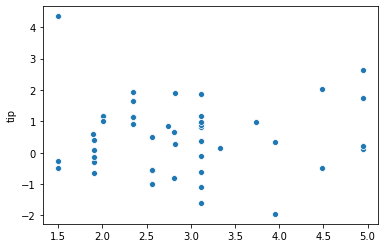

In [111]:
residuals = y_test - y_pred

sns.scatterplot(y_pred, residuals)

> ## Hyperparameter Tuning Randomized Search

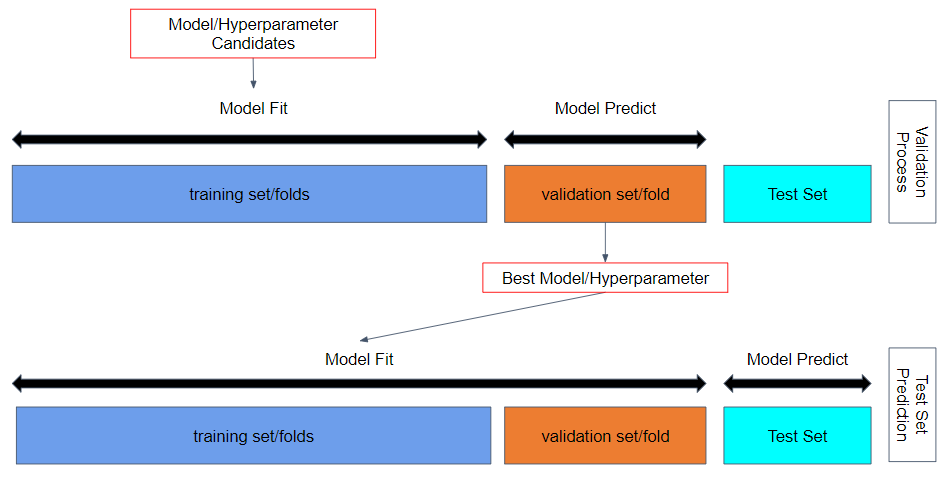

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
hyperparam_space = {
    'min_samples_leaf':[1,5,10,15,20,50], # benck mark min_samples_leaf = 1
    'max_depth':[2,3,4,5,6,7], # bench mark max_depth = 5
    'criterion':['mse','mae']
}

1. min_samples_leaf  6 hyperparameters
1. max_depht 5 hyperparameters
1. CV 5 fold
<br>
so, this step will train model 6*5*5 = 150 times 

In [117]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, random_state = 2020)

randomized_search = RandomizedSearchCV(
    tree, # model to tune
    param_distributions = hyperparam_space, # hyperparameter space
    n_iter = 20,
    cv = 5, # evaluation method
    scoring = 'neg_mean_squared_error', # metrics
    random_state = 2020,
    n_jobs = -1 # use all cores
)

In [118]:
randomized_search.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2020),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             50]},
                   random_state=2020, scoring='neg_mean_squared_error')

In [119]:
print('best score',randomized_search.best_score_)
print('best param',randomized_search.best_params_)

best score -0.9829038972124049
best param {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mse'}


In [120]:
pd.DataFrame(randomized_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013591,0.003519,0.007580,0.001852,1,2,mae,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.738330,-0.851707,-1.323954,-1.509013,-1.356648,-1.155931,0.303358,3
1,0.009816,0.002479,0.006122,0.003777,5,7,mse,"{'min_samples_leaf': 5, 'max_depth': 7, 'crite...",-1.266981,-0.767827,-1.325200,-2.239966,-1.472244,-1.414444,0.475952,19
2,0.010409,0.003168,0.007006,0.002856,5,4,mse,"{'min_samples_leaf': 5, 'max_depth': 4, 'crite...",-1.144108,-0.817462,-1.375826,-2.197390,-1.445703,-1.396098,0.456784,18
3,0.011398,0.002260,0.005185,0.001163,20,2,mae,"{'min_samples_leaf': 20, 'max_depth': 2, 'crit...",-0.722048,-1.093600,-1.182453,-1.955167,-1.356648,-1.261983,0.403899,6
4,0.012023,0.002285,0.005999,0.001080,5,2,mae,"{'min_samples_leaf': 5, 'max_depth': 2, 'crite...",-0.722048,-1.093600,-1.215538,-1.960931,-1.356648,-1.269753,0.404778,8
5,0.010192,0.002809,0.008214,0.003793,50,7,mse,"{'min_samples_leaf': 50, 'max_depth': 7, 'crit...",-0.879731,-0.900169,-1.479036,-2.103678,-1.437448,-1.360013,0.450628,12
6,0.008792,0.000967,0.005415,0.001935,1,4,mse,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",-0.771622,-0.665101,-1.593723,-1.029129,-0.854944,-0.982904,0.327795,1
7,0.013164,0.006684,0.004180,0.000406,5,3,mse,"{'min_samples_leaf': 5, 'max_depth': 3, 'crite...",-0.987999,-0.897975,-1.295115,-2.212884,-1.413923,-1.361579,0.466126,14
8,0.011371,0.003816,0.004388,0.000488,20,4,mae,"{'min_samples_leaf': 20, 'max_depth': 4, 'crit...",-0.805774,-1.082392,-1.204603,-1.997315,-1.332621,-1.284541,0.396694,9
9,0.011965,0.004551,0.005190,0.001166,1,2,mse,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.816130,-0.882642,-1.424336,-1.108872,-0.924132,-1.031222,0.219261,2


Try again and change random_state in Randomized Search

> ## Final Result Comparison

FINAL MODEL PERFORMANCE BEFORE

In [121]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5)
tree.fit(X_train_val,y_train_val)
y_pred = tree.predict(X_test)
print(mean_squared_error(y_test,y_pred))

1.4808803946104498


FINAL MODEL PERFORMACE AFTER

In [123]:
tree_final = randomized_search.best_estimator_
tree_final.fit(X_train_val,y_train_val)
y_pred = tree_final.predict(X_test)
print(mean_squared_error(y_test,y_pred))

1.3093536770005814


Hyperparameter tuning decrease mse from 1.48 to 1.31

# Information Leakage

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
rnd = np.random.RandomState(seed = 2020)
X = rnd.normal(size = (100, 10000)) 
y = rnd.normal(size = (100, ))

Data generated with condition that there is no relationship between X and y

> ## Information Leakage

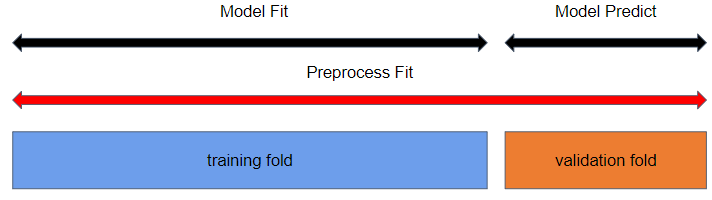

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y) #Perhatikan data yg dipakai untuk fitting
X_selected = select.transform(X)
X_selected.shape

(100, 500)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [ ]:
cross_val_score(Ridge(), X_selected, y, cv = 5)

array([0.92165345, 0.89445668, 0.92827414, 0.93088559, 0.91044624])

This result indicating a very good model while data generated entirely random. weird isn't it ?

> ## No Information Leakage

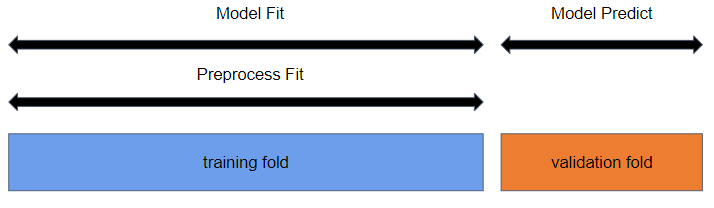

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
select = SelectPercentile(score_func=f_regression, percentile=5)

pipe = Pipeline([
                 ("select", select),
                 ("ridge", Ridge())
])

In [ ]:
cross_val_score(pipe, X, y, cv = 5)

array([-0.0330359 , -0.07840338, -0.06731106, -0.04544685, -0.07314928])

this is what the result should be the R-square is vary small or even negative. Information leakege show that the model can have overly optimistic result to validation folds.

# Algorithm Chains : adult dataset

> ## Data

In [125]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

In [126]:
df_adult = pd.read_csv('adult.csv')

In [127]:
df_adult.replace('?',np.nan,inplace = True)

In [128]:
df_adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

> ## Preprocessing

In [129]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
                                ], remainder = 'passthrough')

> ## Data Splitting

In [130]:
X = df_adult.drop(columns = ['fnlwgt','income','education'])
y = np.where(df_adult['income']=='>50K',1,0)

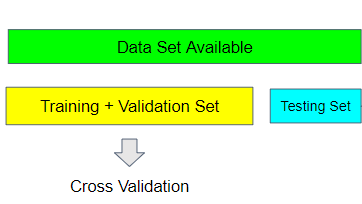

In [131]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    random_state = 2020)

> ## Model Evaluation : Benchmark  

In [132]:
skfold = StratifiedKFold(n_splits = 5)
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',tree)
])

In [133]:
model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring = 'f1')

In [134]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [0.59255482 0.60502513 0.59898477 0.62110553 0.6221336 ]
CV score mean 0.6079607686024484
CV score std 0.011833711368265581


FLEXIBLE METRICS

In [135]:
def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)])
  model_cv = cross_val_score(estimator, X_train_val, y_train_val, cv = skfold, scoring = metric)
  return model_cv

In [136]:
def print_result(model_cv):
  print('CV score',model_cv)
  print('CV score mean',model_cv.mean())
  print('CV score std',model_cv.std())

In [137]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)
metric = 'f1'

model_cv = model_evaluation_cv(model, 'f1')
print_result(model_cv)

CV score [0.60656541 0.66446748 0.63331714 0.64336325 0.6657277 ]
CV score mean 0.6426881972553019
CV score std 0.021901069053451787


In [138]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2020)
metric = 'f1'

model_cv = model_evaluation_cv(model, 'f1')
print_result(model_cv)

CV score [0.59255482 0.60502513 0.59898477 0.62110553 0.6221336 ]
CV score mean 0.6079607686024484
CV score std 0.011833711368265581


In [139]:
log regresssion memiliki performa yg lebih baik, walau sedikit lebih tidak stabil

SyntaxError: invalid syntax (<ipython-input-139-00288d88faa3>, line 1)

MODEL PERFORMANCE

In [140]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])
estimator.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                    

In [141]:
y_pred = estimator.predict(X_test)

In [142]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.588265306122449
precision 0.7334605597964376
f1 0.6528878822197056


In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [144]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

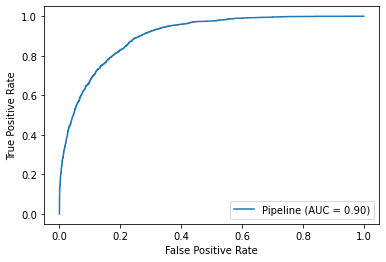

In [145]:
plot_roc_curve(estimator, X_test, y_test)

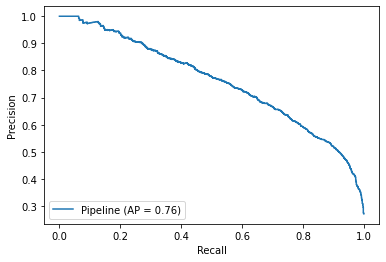

In [146]:
plot_precision_recall_curve(estimator, X_test, y_test)

> ## Hyperparameter Tuning

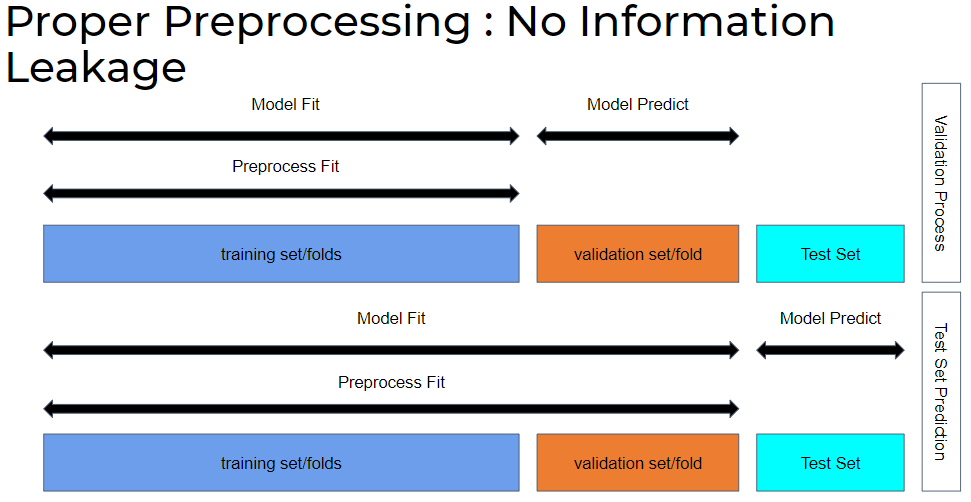

In [147]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

hyperparam_space = {
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear','newton-cg']
}

skfold = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [148]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary '
                                                                         'encoder',
                

In [149]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.6460237640462658
best param {'clf__C': 100, 'clf__solver': 'newton-cg'}


In [150]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.008834,0.185529,0.133841,0.009679,100,liblinear,"{'clf__C': 100, 'clf__solver': 'liblinear'}",0.606654,0.660085,0.632089,0.642185,0.665728,0.641348,0.021145,7
1,27.276088,4.979427,0.098338,0.030641,100,newton-cg,"{'clf__C': 100, 'clf__solver': 'newton-cg'}",0.625773,0.665730,0.628846,0.642790,0.666980,0.646024,0.017568,1
2,2.715878,0.852805,0.137223,0.030145,10,liblinear,"{'clf__C': 10, 'clf__solver': 'liblinear'}",0.618005,0.661343,0.631120,0.640535,0.665728,0.643346,0.018024,5
3,19.102774,2.647970,0.083178,0.012672,10,newton-cg,"{'clf__C': 10, 'clf__solver': 'newton-cg'}",0.625119,0.665730,0.628846,0.643093,0.666980,0.645954,0.017710,2
4,3.636477,0.288623,0.136037,0.048387,1,liblinear,"{'clf__C': 1, 'clf__solver': 'liblinear'}",0.606565,0.664467,0.633317,0.643363,0.665728,0.642688,0.021901,6
5,13.434648,2.096627,0.087965,0.023747,1,newton-cg,"{'clf__C': 1, 'clf__solver': 'newton-cg'}",0.624762,0.664477,0.627526,0.642756,0.666353,0.645175,0.017636,3
6,2.389540,0.256521,0.084085,0.005318,0.1,liblinear,"{'clf__C': 0.1, 'clf__solver': 'liblinear'}",0.601779,0.646301,0.629720,0.637363,0.644068,0.631846,0.016108,8
7,11.317433,0.614274,0.092855,0.013782,0.1,newton-cg,"{'clf__C': 0.1, 'clf__solver': 'newton-cg'}",0.622778,0.661633,0.623188,0.644550,0.664775,0.643385,0.018025,4
8,2.260385,0.334983,0.096941,0.020732,0.01,liblinear,"{'clf__C': 0.01, 'clf__solver': 'liblinear'}",0.578785,0.587368,0.562803,0.584631,0.588912,0.580500,0.009499,10
9,9.414759,0.902402,0.066621,0.014349,0.01,newton-cg,"{'clf__C': 0.01, 'clf__solver': 'newton-cg'}",0.615007,0.636719,0.605144,0.625490,0.652724,0.627017,0.016613,9


> ## Final Result Comparison

MODEL PERFORMANCE BEFORE

In [151]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

estimator.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                    

In [152]:
y_pred = estimator.predict(X_test)

In [153]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.588265306122449
precision 0.7334605597964376
f1 0.6528878822197056


In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [155]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

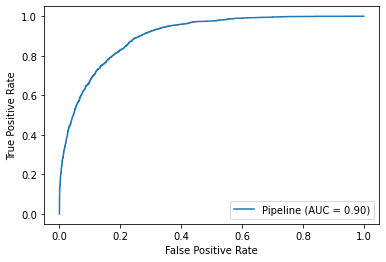

In [156]:
plot_roc_curve(estimator, X_test, y_test)

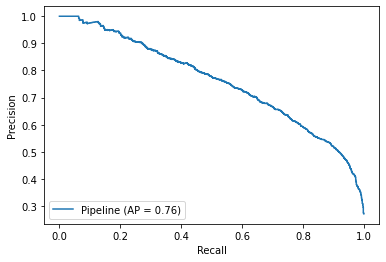

In [157]:
plot_precision_recall_curve(estimator, X_test, y_test)

MODEL PERFORMANCE AFTER

In [158]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                    

In [159]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [160]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.5984693877551021
precision 0.7276674937965261
f1 0.6567749160134378


In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.60      0.66      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



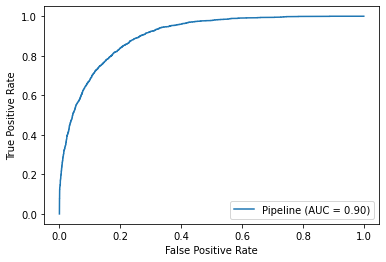

In [162]:
plot_roc_curve(grid_search.best_estimator_, X_test, y_test)

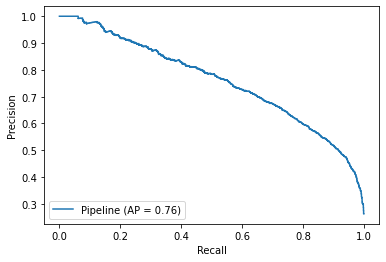

In [163]:
plot_precision_recall_curve(grid_search.best_estimator_, X_test, y_test)

f1 score slightly increase from 0.6527 to 0.6567